In [1]:
# imports necessary plotting libraries, color definitions, etc. 
from src.utilities.plotting_import import *

# Load data

In [2]:
# A subset of CNOT depths selected for the final plot
hardware_depths_hybrid = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_hardware_depths_hybrid.p','rb'))
hardware_depths_naimark = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_hardware_depths_naimark.p','rb'))
hardware_depths_binary = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_hardware_depths_binary.p','rb'))

In [3]:
# Load simualtion with the "noisy" CNOT
[error_range, reconstruction_infidelities_hybrid_noisy_cnot] = pickle.load(open(path+'data/final_results/noisy_simulation_measurement_feedforward_all_depths/detector_infidelities_hybrid_noisy_cnot.p', 'rb'))
[error_range, reconstruction_infidelities_binary_noisy_cnot] = pickle.load(open(path+'data/final_results/noisy_simulation_measurement_feedforward_all_depths/detector_infidelities_binary_noisy_cnot.p', 'rb'))
[error_range, reconstruction_infidelities_naimark_noisy_cnot] = pickle.load(open(path+'data/final_results/noisy_simulation_measurement_feedforward_all_depths/detector_infidelities_naimark_noisy_cnot.p', 'rb'))

In [4]:
# Load simualtion with the ideal CNOT
[error_range, reconstruction_infidelities_hybrid] = pickle.load(open(path+'data/final_results/noisy_simulation_measurement_feedforward_all_depths/detector_infidelities_hybrid_noiseless_cnot.p', 'rb'))
[error_range, reconstruction_infidelities_binary] = pickle.load(open(path+'data/final_results/noisy_simulation_measurement_feedforward_all_depths/detector_infidelities_binary_noiseless_cnot.p', 'rb'))
[error_range, reconstruction_infidelities_naimark] = pickle.load(open(path+'data/final_results/noisy_simulation_measurement_feedforward_all_depths/detector_infidelities_naimark_noiseless_cnot.p', 'rb'))

In [5]:
# Convert bewteen infidelity and fidelity
reconstruction_fidelities_hybrid = [[1-inf for inf in list] for list in reconstruction_infidelities_hybrid]
reconstruction_fidelities_binary = [[1-inf for inf in list] for list in reconstruction_infidelities_binary]
reconstruction_fidelities_naimark = [[1-inf for inf in list] for list in reconstruction_infidelities_naimark]

In [6]:
reconstruction_fidelities_hybrid_noisy_cnot = [[1-inf for inf in list] for list in reconstruction_infidelities_hybrid_noisy_cnot]
reconstruction_fidelities_binary_noisy_cnot = [[1-inf for inf in list] for list in reconstruction_infidelities_binary_noisy_cnot]
reconstruction_fidelities_naimark_noisy_cnot = [[1-inf for inf in list] for list in reconstruction_infidelities_naimark_noisy_cnot]

In [7]:
ideal_depths_hybrid = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_ideal_depths_hybrid.p','rb'))
ideal_depths_naimark = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_ideal_depths_naimark.p','rb'))
ideal_depths_binary = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_ideal_depths_binary.p','rb'))

In [8]:
# Noiseless fidelities - limited by approximate compiling only
ideal_fidelities_hybrid = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_fidelities_ideal_hybrid.p','rb'))
ideal_fidelities_naimark = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_fidelities_ideal_naimark.p','rb'))
ideal_fidelities_binary = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_fidelities_ideal_binary.p','rb'))

In [9]:
# Error-mitigated experimental fidelities - limited by noise and approximate compiling
fidelities_naimark_rem = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_fidelities_kolkata_naimark_rem.p','rb'))
fidelities_binary_crem = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_fidelities_kolkata_binary_crem.p','rb'))
fidelities_hybrid_crem = pickle.load(open(path+'data/final_results/detector_tomography_results/detector_2q_fidelities_kolkata_hybrid_crem.p','rb'))

In [10]:
# Peak fidelities for each algorithm
best_depth_hybrid = max(fidelities_hybrid_crem, key=fidelities_hybrid_crem.get)
best_depth_naimark = max(fidelities_naimark_rem, key=fidelities_naimark_rem.get)
best_depth_binary = max(fidelities_binary_crem, key=fidelities_binary_crem.get)

best_depth_index_hybrid = hardware_depths_hybrid.index(best_depth_hybrid)
best_depth_index_naimark = hardware_depths_naimark.index(best_depth_naimark)
best_depth_index_binary = hardware_depths_binary.index(best_depth_binary)

In [11]:
error_range

[0, 0.025, 0.05, 0.075, 0.1]

In [12]:
reconstruction_fidelities_hybrid_noisy_cnot = reconstruction_fidelities_hybrid_noisy_cnot[2]
reconstruction_fidelities_binary_noisy_cnot = reconstruction_fidelities_binary_noisy_cnot[2]
reconstruction_fidelities_naimark_noisy_cnot = reconstruction_fidelities_naimark_noisy_cnot[2]

# Plot

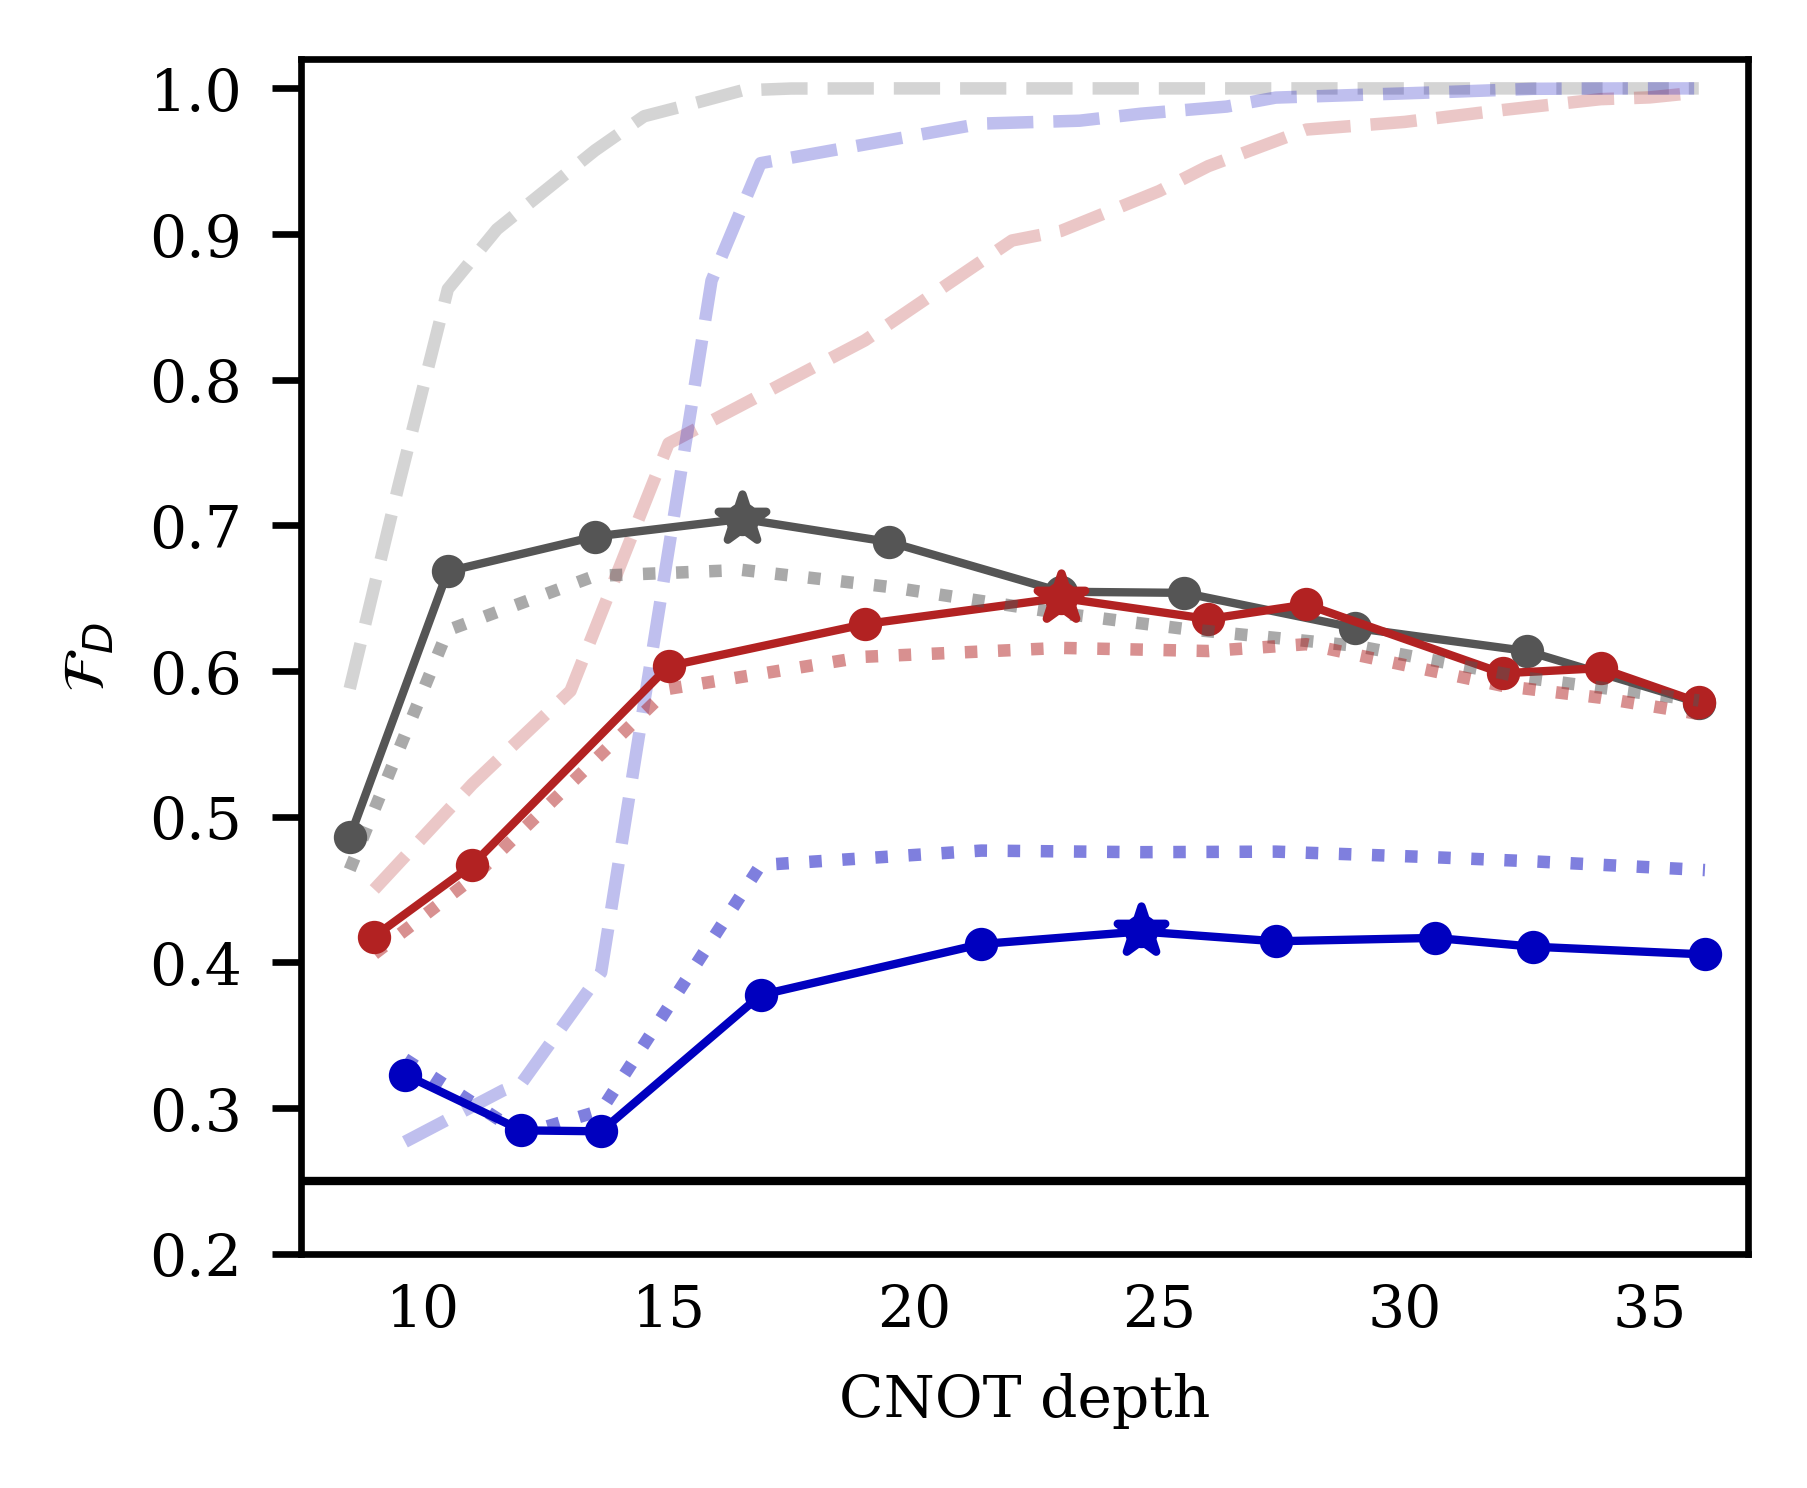

In [13]:
# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(ncols=1, nrows=1, 
                        figsize=(figure_size_x/2, figure_size_y/1.5),
                        gridspec_kw={'height_ratios': [1]})

# Ideal fidelities 
ax.plot(ideal_depths_hybrid, 
        ideal_fidelities_hybrid, 
        '--', 
        color=dark_grey,
        label='Hybrid: ideal',
        alpha=0.25,
        linewidth=1.5)
ax.plot(ideal_depths_naimark, 
        ideal_fidelities_naimark, 
        '--', 
        color=red,
        label='Naimark: ideal',
        alpha=0.25,
        linewidth=1.5)
ax.plot(ideal_depths_binary, 
        ideal_fidelities_binary, 
        '--', 
        color=blue,
        label='Binary: ideal',
        alpha=0.25,
        linewidth=1.5)

# Hardware fidelities
ax.plot(hardware_depths_hybrid, 
            [fidelities_hybrid_crem[d] for d in hardware_depths_hybrid], 
            '.-', 
            color=dark_grey,
            label='Hybrid: experiment')
ax.plot(hardware_depths_naimark, 
            [fidelities_naimark_rem[d] for d in hardware_depths_naimark], 
            '.-', 
            color=red,
            label='Naimark')
ax.plot(hardware_depths_binary, 
            [fidelities_binary_crem[d] for d in hardware_depths_binary], 
            '.-', 
            color=blue,
            label='Binary')

# Random outcome baseline
ax.hlines(0.25,xmin=0,xmax=40, color=black, linestyle='-', label='Random POVM')

# Mark top fidleities with a star
ax.scatter(best_depth_hybrid, 
              fidelities_hybrid_crem[best_depth_hybrid], 
              marker='*',
              color=dark_grey,
              alpha=1,
              zorder=3)
ax.scatter(best_depth_naimark, 
              fidelities_naimark_rem[best_depth_naimark], 
              marker='*',
              color=red,
              alpha=1,
              zorder=3)
ax.scatter(best_depth_binary, 
              fidelities_binary_crem[best_depth_binary], 
              marker='*',
              color=blue,
              alpha=1,
              zorder=3)

# Noisy simulation
ax.plot(hardware_depths_hybrid, 
        reconstruction_fidelities_hybrid_noisy_cnot, 
        ':', 
        color=dark_grey, 
        alpha=0.5,
        linewidth=1.5)
ax.plot(hardware_depths_binary, 
        reconstruction_fidelities_binary_noisy_cnot, 
        ':', 
        color=blue, 
        alpha=0.5,
        linewidth=1.5)
ax.plot(hardware_depths_naimark, 
        reconstruction_fidelities_naimark_noisy_cnot, 
        ':', 
        color=red, 
        alpha=0.5,
        linewidth=1.5)

# Axes properties
ax.set_xlim(hardware_depths_hybrid[0]-1, hardware_depths_hybrid[-1]+1)
ax.set_ylim(0.2,1.02)
ax.set_xlabel('CNOT depth')
ax.set_ylabel('$\mathcal{F}_D$')

# Save as SVG to import in Ikscape
fig.tight_layout()